In [23]:
import random

In [27]:
#Question 1
lst_pos = []
for i in range(200):
    count = 0
    for j in range(30):
        t = random.random()
        if t <= 0.6: #comes up head
            count += 1 #take one step to the right
            lst_path[i].append("Right")
        else:
            count -= 1 #take one step to the left
            lst_path[i].append("Left")
    lst_pos.append(count)

In [30]:
import matplotlib.pyplot as plt

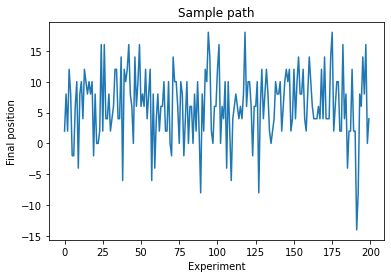

In [38]:
lst_x = [i for i in range(200)]
plt.plot(lst_x, lst_pos)
plt.title("Sample path")
plt.xlabel("Experiment")
plt.ylabel("Final position")
plt.show()

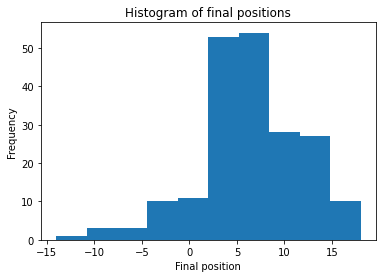

In [39]:
plt.hist(lst_pos)
plt.title("Histogram of final positions")
plt.xlabel("Final position")
plt.ylabel("Frequency")
plt.show()

In [45]:
import statistics
import numpy as np
sample_mean = statistics.mean(lst_pos)
sample_std = statistics.stdev(lst_pos)

In [61]:
sample_std
sample_variance = sample_std**2
sample_variance

30.222713567839193

In [62]:
sample_mean
#The value of the mean is expected to be 0.6*30*1 + 0.4*30*-1 = 6

6.22

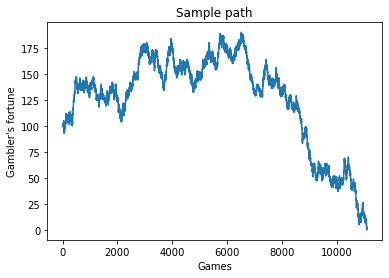

In [79]:
#Question 2
iteration_count = 2000000
r= [0 for i in range(iteration_count)] 
i=0
r[i]=100 #gambler’s initial fortune
lst_index = [0]
running_time = []
while r[i]>0 and r[i]<2100 and i<iteration_count-1:
    i=i+1
    lst_index.append(i)
    w = random.random() 
    if w <= 0.5:
        r[i] = r[i-1] + 1 #gambler wins
    else:
        r[i] = r[i-1] - 1 #gambler loses
running_time.append(len(lst_index))
plt.plot(lst_index, r[:len(lst_index)])
plt.xlabel("Games")
plt.ylabel("Gambler's fortune")
plt.title("Sample path")
plt.show()

In [75]:
#run for many times to get different running times
running = []
for count in range(200,2000000,1000):
    r= [0 for i in range(count)] 
    i=0
    r[i]=100 #gambler’s initial fortune
    lst_index = [0]
    while r[i]>0 and r[i]<2100 and i<count-1:
        i=i+1
        lst_index.append(i)
        w = random.random() 
        if w <= 0.5:
            r[i] = r[i-1] + 1 #gambler wins
        else:
            r[i] = r[i-1] - 1 #gambler loses
    running.append(len(lst_index))

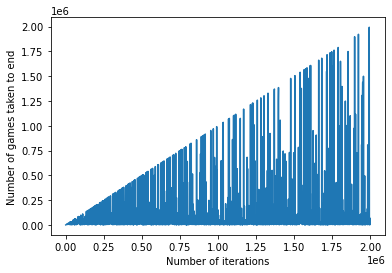

In [81]:
x_axis = [i for i in range(200,2000000,1000)]
plt.plot(x_axis, running)
plt.xlabel("Number of iterations")
plt.ylabel("Number of games taken to end")
plt.show()

In [83]:
mean_duration = statistics.mean(running)
mean_duration

130122.413

In [84]:
variance_duration = statistics.stdev(running)**2
variance_duration

80102162983.29308

The above is our result when we vary the upper bounds of the iteration - we see that at the beginning when we have fewer iterations, the gambler would play on until the upper bound. As we increase the number of iterations, games typically end earlier, but there will always be games that are played to the limit.

It seems that by varying the number of iterations, we get closer to the actual population mean (since we have more games that end before the limit), but it drastically increase the variance since there will always be games that are played to the limit.

Monty Hall problem - my approach: we should always switch. Consider two cases:

Case 1: The door you initially chose is the wrong door. This happens with 2/3 probability. Since the host always open a wrong door, there will only be the right door left. Switching gives you 100% probability of success.

Case 2: The door you initially chose is the right door. This happens with 1/3 probability. If you switch, you will 100% get it wrong.

However, case 1 is twice as likely to happen as case 2, so on average we should always switch.